In [2]:
import pandas as pd
import numpy as np

In [3]:
# Set seed for reproducibility
np.random.seed(42)

# Generate 100 random weekly mileage values between 30 and 100
miles_per_week = np.random.randint(30, 101, size=100)

# Generate 'yes' or 'no' labels: assume those running > 65 miles/week are more likely to complete a 50m ultra
completed_50m_ultra = ['yes' if miles > 65 and np.random.rand() > 0.2 else 'no' for miles in miles_per_week]

# Create DataFrame
df = pd.DataFrame({
    'miles_per_week': miles_per_week,
    'completed_50m_ultra': completed_50m_ultra
})

print(df.head())

   miles_per_week completed_50m_ultra
0              81                 yes
1              44                  no
2              90                 yes
3              50                  no
4              53                  no


In [4]:
from sklearn.preprocessing import OrdinalEncoder

In [5]:
finished_race = ['no', 'yes']

In [6]:
enc = OrdinalEncoder(categories=[finished_race])

In [7]:
df['completed_50m_ultra'] = enc.fit_transform(df[['completed_50m_ultra']])

In [8]:
df

,miles_per_week,completed_50m_ultra
0,81,1.0
1,44,0.0
2,90,1.0
3,50,0.0
4,53,0.0
...,...,...
95,66,1.0
96,73,1.0
97,64,0.0
98,94,1.0


In [9]:
import matplotlib.pyplot as plt

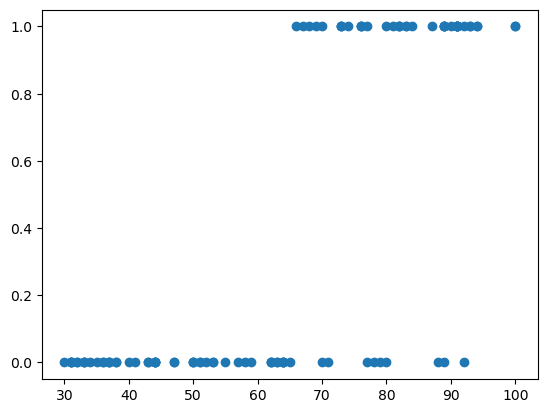

In [10]:
plt.scatter(df.miles_per_week, df.completed_50m_ultra)

In [11]:
import seaborn as sns

<Axes: xlabel='completed_50m_ultra', ylabel='count'>

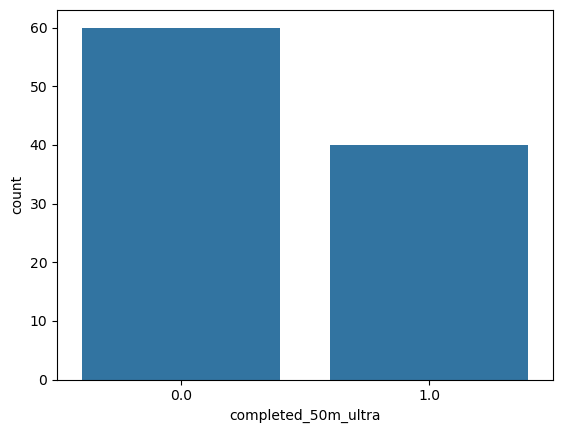

In [12]:
sns.countplot(x = 'completed_50m_ultra', data = df)

In [13]:
X = df.iloc[:, 0:1]

In [14]:
y = df.iloc[:, 1]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11, test_size=0.2)

In [17]:
X_train.shape

(80, 1)

In [18]:
X_test.shape

(20, 1)

In [19]:
y_train.shape

(80,)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression()

In [22]:
model.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
model.score(X_test, y_test)

0.85

In [25]:
from sklearn.metrics import confusion_matrix 

In [26]:
print(confusion_matrix(y_test, y_pred))

[[12  3]
 [ 0  5]]


In [27]:
from sklearn.metrics import classification_report


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89        15
         1.0       0.62      1.00      0.77         5

    accuracy                           0.85        20
   macro avg       0.81      0.90      0.83        20
weighted avg       0.91      0.85      0.86        20

